In [156]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [120]:
url = "https://www.isyatirim.com.tr/tr-tr/analiz/hisse/Sayfalar/Temel-Degerler-Ve-Oranlar.aspx?endeks=03#page-1"
r = requests.get(url=url)
print(r)

<Response [200]>


In [121]:
s = BeautifulSoup(r.text,"html.parser")
tablo = s.find("table",{"id":"summaryBasicData"})
tablo

<table cellspacing="0" class="dataTable hover nowrap excelexport" data-csvname="temelozet" id="summaryBasicData" width="100%">
<thead>
<tr>
<th>Kod</th>
<th>Hisse Adı</th>
<th>Sektör</th>
<th class="text-right">Kapanış<br/>(TL)</th>
<th class="text-right">Piyasa Değeri<br/>(mn TL)</th>
<th class="text-right">Piyasa Değeri<br/>(mn $)</th>
<th class="text-right">Halka Açıklık<br/>Oranı (%)</th>
<th class="text-right">Sermaye<br/>(mn TL)</th>
</tr>
</thead>
<tbody id="temelTBody_Ozet">
<tr><td><a href="/tr-tr/analiz/hisse/Sayfalar/sirket-karti.aspx?hisse=AKBNK">AKBNK</a></td><td>Akbank</td><td>Bankacılık</td><td class="text-right">65,15</td><td class="text-right">338.780,0</td><td class="text-right">9.723,2</td><td class="text-right">53,1</td><td class="text-right">5.200,0</td></tr><tr><td><a href="/tr-tr/analiz/hisse/Sayfalar/sirket-karti.aspx?hisse=ALARK">ALARK</a></td><td>Alarko Holding                </td><td>Holdingler</td><td class="text-right">100,30</td><td class="text-right">43.6

In [122]:
tablo = pd.read_html(str(tablo),flavor="lxml")[0]
type(tablo)
tablo

C:\Users\kemal\AppData\Local\Temp\ipykernel_4512\3503528063.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tablo = pd.read_html(str(tablo),flavor="lxml")[0]


,Kod,Hisse Adı,Sektör,Kapanış (TL),Piyasa Değeri (mn TL),Piyasa Değeri (mn $),Halka Açıklık Oranı (%),Sermaye (mn TL)
0,AKBNK,Akbank,Bankacılık,6515,"338.780,0","9.723,2",531,"5.200,0"
1,ALARK,Alarko Holding,Holdingler,10030,"43.630,5","1.252,2",371,4350
2,ASELS,Aselsan,Savunma,7100,"323.760,0","9.292,1",258,"4.560,0"
3,ASTOR,Astor Enerji,Elektrik Enerji Ürt.Teçh/Tesis Kurulum,10070,"100.498,6","2.884,4",277,9980
4,BIMAS,Bim Birleşik Mağazalar A.Ş,Perakande - Ticaret,52600,"319.387,2","9.166,6",681,6072
5,DOAS,Doğuş Otomotiv,Otomotiv,21550,"47.410,0","1.360,7",345,2200
6,EKGYO,Emlak Konut GYO,GYO,1318,"50.084,0","1.437,4",483,"3.800,0"
7,ENKAI,Enka İnşaat,İnşaat- Taahhüt,5355,"321.300,0","9.221,5",84,"6.000,0"
8,EREGL,Ereğli Demir Çelik,Demir-Çelik Temel,2616,"183.120,0","5.255,7",475,"7.000,0"
9,FROTO,Ford Otosan,Otomotiv,97900,"343.540,9","9.859,9",177,3509


In [123]:
hisseler = [i for i in tablo["Kod"]]

parameters = (
    ("hisse","AKFYE"),
    ("startdate","10-12-2022"),
    ("enddate","10-12-2024")
)

url2 = "https://www.isyatirim.com.tr/_layouts/15/Isyatirim.Website/Common/Data.aspx/HisseTekil?"

r2 = requests.get(url2,params=parameters).json()["value"]
print(r2)
data = pd.DataFrame.from_dict(r2)
print(data)

[{'HGDG_HS_KODU': 'AKFYE', 'HGDG_TARIH': '16-03-2023', 'HGDG_KAPANIS': 10.78, 'HGDG_AOF': 10.78, 'HGDG_MIN': 10.78, 'HGDG_MAX': 10.78, 'HGDG_HACIM': 839471.0, 'END_ENDEKS_KODU': '01', 'END_TARIH': 1678914000000, 'END_SEANS': 2, 'END_DEGER': 5229.58, 'DD_DOVIZ_KODU': 'USD', 'DD_DT_KODU': '01', 'DD_TARIH': 1678914000000, 'DD_DEGER': 19.0098, 'DOLAR_BAZLI_FIYAT': 0.5671, 'ENDEKS_BAZLI_FIYAT': 0.0021, 'DOLAR_HACIM': 44159.907, 'SERMAYE': 1016031947.0, 'HG_KAPANIS': 10.78, 'HG_AOF': 10.78, 'HG_MIN': 10.78, 'HG_MAX': 10.78, 'PD': 10952824117.3502, 'PD_USD': 576167246.22827, 'HAO_PD': None, 'HAO_PD_USD': None, 'HG_HACIM': 839471.0, 'DOLAR_BAZLI_MIN': 0.5671, 'DOLAR_BAZLI_MAX': 0.5671, 'DOLAR_BAZLI_AOF': 0.5671}, {'HGDG_HS_KODU': 'AKFYE', 'HGDG_TARIH': '17-03-2023', 'HGDG_KAPANIS': 11.85, 'HGDG_AOF': 11.85, 'HGDG_MIN': 11.85, 'HGDG_MAX': 11.85, 'HGDG_HACIM': 942229.0, 'END_ENDEKS_KODU': '01', 'END_TARIH': 1679000400000, 'END_SEANS': 2, 'END_DEGER': 5136.44, 'DD_DOVIZ_KODU': 'USD', 'DD_DT_KODU'

In [129]:
data = data.iloc[:,0:3]
data.rename(columns={"HGDG_HS_KODU":"Hisse","HGDG_TARIH":"Tarih","HGDG_KAPANIS":"Fiyat"},inplace=True)
data = pd.DataFrame({"Tarih":data["Tarih"],data["Hisse"][0]:data["Fiyat"]})
data

,Tarih,AKFYE
0,16-03-2023,10.78
1,17-03-2023,11.85
2,20-03-2023,13.03
3,21-03-2023,14.33
4,22-03-2023,15.76
...,...,...
430,04-12-2024,18.35
431,05-12-2024,18.72
432,06-12-2024,19.19
433,09-12-2024,19.25


In [131]:
hisseler = [i for i in tablo["Kod"]]

parameters = (
    ("hisse","AKFYE"),
    ("startdate","10-12-2022"),
    ("enddate","10-12-2024")
)
url2 = "https://www.isyatirim.com.tr/_layouts/15/Isyatirim.Website/Common/Data.aspx/HisseTekil?"
for j in hisseler[1:]:
    parameters = (
        ("hisse",j),
        ("startdate","10-12-2022"),
        ("enddate","10-12-2024")
    )
    r2 = requests.get(url2,params=parameters).json()["value"]

    data5 = pd.DataFrame.from_dict(r2).iloc[:,0:3]
    data5.rename(columns={"HGDG_HS_KODU":"Hisse","HGDG_TARIH":"Tarih","HGDG_KAPANIS":"Fiyat"},inplace=True),
    data5 = pd.DataFrame({"Tarih":data5["Tarih"],data5["Hisse"][0]:data5["Fiyat"]})
    data = data.merge(data5,on="Tarih")

data

,Tarih,AKFYE,ALARK,ASELS,ASTOR,BIMAS,DOAS,EKGYO,ENKAI,EREGL,...,SAHOL,SASA,SISE,TCELL,THYAO,TOASO,TTKOM,TUPRS,ULKER,YKBNK
0,16-03-2023,10.78,69.8122,28.0012,57.5763,140.1859,98.2594,6.9733,28.1454,19.6197,...,40.4351,6.2772,46.0576,31.1494,132.2,171.1229,17.95,68.5917,35.94,9.9809
1,17-03-2023,11.85,70.9296,28.5741,63.3340,140.4760,100.2215,6.8476,28.2773,18.7701,...,38.9917,6.0707,44.6019,30.3502,126.5,165.8313,17.89,66.2187,36.76,9.8843
2,20-03-2023,13.03,69.4721,27.6275,57.0396,138.8324,95.6180,6.5864,27.4290,18.2860,...,38.1589,5.7609,43.1074,29.5130,126.1,164.1273,17.16,63.5952,35.52,9.8522
3,21-03-2023,14.33,68.9377,26.5563,61.4798,135.6420,94.7123,6.3640,26.7692,18.2860,...,37.7888,5.8696,42.5834,29.0753,123.9,165.7964,16.72,63.3328,33.38,9.8618
4,22-03-2023,15.76,69.2292,27.4033,59.0401,135.8353,95.0897,6.4994,26.9200,18.3255,...,38.5660,5.7772,43.7868,29.9887,127.9,171.0818,17.09,65.4078,33.48,10.0343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,03-12-2024,18.48,98.5000,70.2000,94.6000,502.0000,222.7000,13.6100,53.4500,26.0000,...,93.4000,4.2400,41.1000,91.0544,287.0,197.2000,46.18,148.7000,114.30,30.1800
430,04-12-2024,18.35,98.2000,70.3000,93.9000,506.5000,229.8000,13.7200,53.3000,26.1000,...,94.2000,4.3600,41.3200,91.2968,289.0,210.5000,46.22,152.4000,114.70,30.3800
431,05-12-2024,18.72,101.0000,71.0000,92.5000,511.0000,229.5000,13.3800,53.6000,25.9200,...,93.6000,4.2900,41.3600,92.1500,293.5,206.5000,47.00,151.2000,116.50,30.5000
432,06-12-2024,19.19,100.9000,71.2000,92.9000,515.0000,229.0000,13.1000,53.6500,25.9200,...,96.1000,4.3100,41.6400,94.3000,300.5,206.2000,47.30,152.1000,116.20,31.7000


In [132]:
data.drop(columns="Tarih",axis=1,inplace=True)
data

,AKFYE,ALARK,ASELS,ASTOR,BIMAS,DOAS,EKGYO,ENKAI,EREGL,FROTO,...,SAHOL,SASA,SISE,TCELL,THYAO,TOASO,TTKOM,TUPRS,ULKER,YKBNK
0,10.78,69.8122,28.0012,57.5763,140.1859,98.2594,6.9733,28.1454,19.6197,535.8964,...,40.4351,6.2772,46.0576,31.1494,132.2,171.1229,17.95,68.5917,35.94,9.9809
1,11.85,70.9296,28.5741,63.3340,140.4760,100.2215,6.8476,28.2773,18.7701,523.8754,...,38.9917,6.0707,44.6019,30.3502,126.5,165.8313,17.89,66.2187,36.76,9.8843
2,13.03,69.4721,27.6275,57.0396,138.8324,95.6180,6.5864,27.4290,18.2860,510.2027,...,38.1589,5.7609,43.1074,29.5130,126.1,164.1273,17.16,63.5952,35.52,9.8522
3,14.33,68.9377,26.5563,61.4798,135.6420,94.7123,6.3640,26.7692,18.2860,520.2049,...,37.7888,5.8696,42.5834,29.0753,123.9,165.7964,16.72,63.3328,33.38,9.8618
4,15.76,69.2292,27.4033,59.0401,135.8353,95.0897,6.4994,26.9200,18.3255,542.7786,...,38.5660,5.7772,43.7868,29.9887,127.9,171.0818,17.09,65.4078,33.48,10.0343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,18.48,98.5000,70.2000,94.6000,502.0000,222.7000,13.6100,53.4500,26.0000,994.5000,...,93.4000,4.2400,41.1000,91.0544,287.0,197.2000,46.18,148.7000,114.30,30.1800
430,18.35,98.2000,70.3000,93.9000,506.5000,229.8000,13.7200,53.3000,26.1000,996.5000,...,94.2000,4.3600,41.3200,91.2968,289.0,210.5000,46.22,152.4000,114.70,30.3800
431,18.72,101.0000,71.0000,92.5000,511.0000,229.5000,13.3800,53.6000,25.9200,993.5000,...,93.6000,4.2900,41.3600,92.1500,293.5,206.5000,47.00,151.2000,116.50,30.5000
432,19.19,100.9000,71.2000,92.9000,515.0000,229.0000,13.1000,53.6500,25.9200,998.0000,...,96.1000,4.3100,41.6400,94.3000,300.5,206.2000,47.30,152.1000,116.20,31.7000


In [140]:
gelir = data.pct_change().mean()*252
sonuc = pd.DataFrame({"Gelir":gelir,"Oynaklık":data.pct_change().std()*np.sqrt(252)})
sonuc.reset_index(inplace=True)
sonuc = sonuc.rename({"index":"Hisse"},axis=1)
sonuc

,Hisse,Gelir,Oynaklık
0,AKFYE,0.512048,0.592802
1,ALARK,0.309233,0.435417
2,ASELS,0.634840,0.427919
3,ASTOR,0.481415,0.558361
4,BIMAS,0.853173,0.407541
5,DOAS,0.568621,0.443194
6,EKGYO,0.501246,0.490932
7,ENKAI,0.480309,0.394884
8,EREGL,0.252439,0.366047
9,FROTO,0.432181,0.385967


In [141]:
sonuc.to_csv(r"F:\anlas\Python ile Makine Öğrenmesi\sonuc.csv",index=False)

In [142]:
data = pd.read_csv(r"F:\anlas\Python ile Makine Öğrenmesi\sonuc.csv")
data2 = data.copy()
data2.head()

,Hisse,Gelir,Oynaklık
0,AKFYE,0.512048,0.592802
1,ALARK,0.309233,0.435417
2,ASELS,0.634840,0.427919
3,ASTOR,0.481415,0.558361
4,BIMAS,0.853173,0.407541


In [150]:
# MinMaxScaler used for clusters
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(data2.iloc[:,1:]),columns=["Gelir","Oynaklık"])

In [151]:
X

,Gelir,Oynaklık
0,0.616325,0.953100
1,0.485914,0.309984
2,0.695281,0.279347
3,0.596628,0.812366
4,0.835671,0.196077
5,0.652702,0.341765
6,0.609380,0.536835
7,0.595917,0.144360
8,0.449395,0.026522
9,0.564970,0.107921


c:\Users\kemal\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Sistem belirtilen dosyayı bulamıyor
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\kemal\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\kemal\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\kemal\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1036, in _

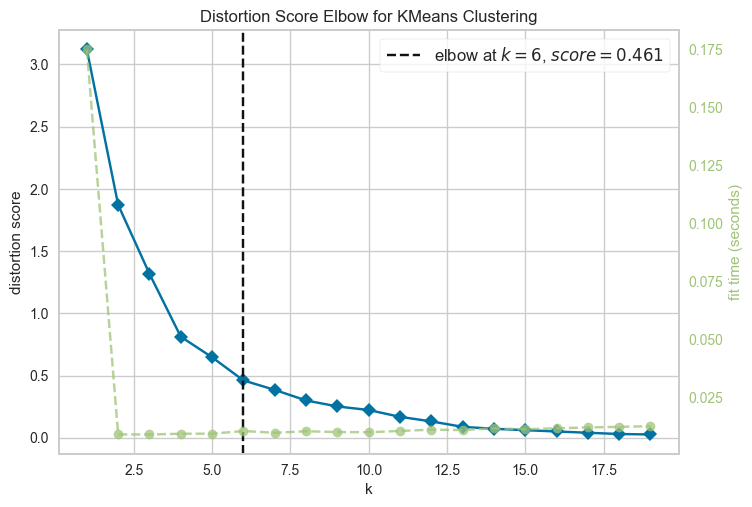

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [157]:
kmodel = KMeans(random_state=3)
graph = KElbowVisualizer(kmodel,k=range(1,20))
graph.fit(X)
graph.poof()

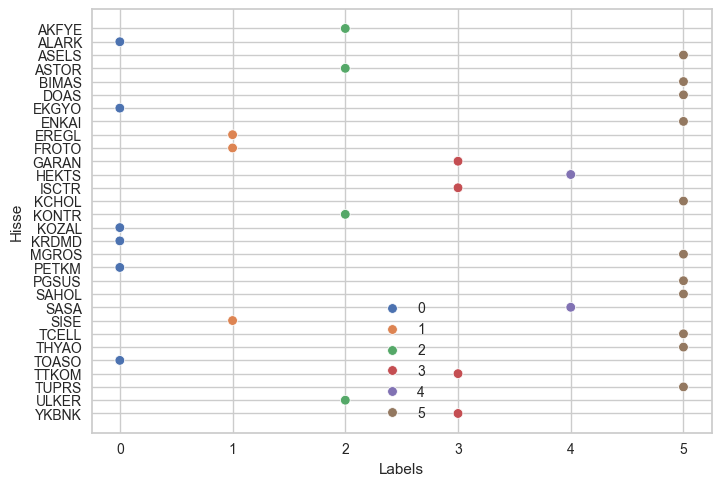

In [159]:
# according to yellowbrick's result k = 6 acc. to elbow method
kmodel = KMeans(n_clusters=6,random_state=3)
kmodel.fit(X)
sonuc["Labels"] = kmodel.labels_

sns.scatterplot(x="Labels",y="Hisse",data=sonuc,hue=kmodel.labels_,palette="deep")
plt.show()